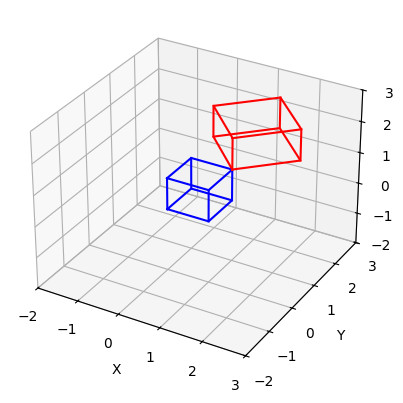

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Fungsi untuk membuat matriks transformasi
def translation_matrix(tx, ty, tz):
    return np.array([
        [1, 0, 0, tx],
        [0, 1, 0, ty],
        [0, 0, 1, tz],
        [0, 0, 0, 1]
    ])

def scaling_matrix(sx, sy, sz):
    return np.array([
        [sx, 0,  0,  0],
        [0,  sy, 0,  0],
        [0,  0,  sz, 0],
        [0,  0,  0,  1]
    ])

def rotation_matrix_z(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([
        [c, -s, 0, 0],
        [s,  c, 0, 0],
        [0,  0, 1, 0],
        [0,  0, 0, 1]
    ])

# Fungsi untuk menerapkan transformasi
def apply_transformation(vertices, transformation):
    ones = np.ones((vertices.shape[0], 1))
    homogenous_vertices = np.hstack([vertices, ones])
    transformed = homogenous_vertices @ transformation.T
    return transformed[:, :3]

# Membuat kubus
def create_cube():
    return np.array([
        [0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 1, 1]
    ])

# Plotkan kubus
def plot_cube(ax, vertices, color="blue", alpha=0.5):
    edges = [
        [vertices[0], vertices[1], vertices[2], vertices[3], vertices[0]],  # Base
        [vertices[4], vertices[5], vertices[6], vertices[7], vertices[4]],  # Top
        [vertices[0], vertices[4]],
        [vertices[1], vertices[5]],
        [vertices[2], vertices[6]],
        [vertices[3], vertices[7]]
    ]
    for edge in edges:
        ax.plot([v[0] for v in edge], [v[1] for v in edge], [v[2] for v in edge], color=color)

# Setup awal
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Buat kubus awal
cube = create_cube()

# Plotkan kubus awal
plot_cube(ax, cube, color="blue")

# Terapkan transformasi (translasi, penskalaan, rotasi)
transformation = (
    translation_matrix(1, 1, 1) @ 
    scaling_matrix(1.5, 1.5, 1) @ 
    rotation_matrix_z(np.pi / 4)
)

transformed_cube = apply_transformation(cube, transformation)

# Plotkan kubus hasil transformasi
plot_cube(ax, transformed_cube, color="red")

# Label dan set tampilan
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-2, 3])
ax.set_ylim([-2, 3])
ax.set_zlim([-2, 3])
plt.show()


In [2]:
data_panen = {
    "lokasi1": {
        "nama_lokasi": "Kebun A",
        "hasil_panen": {"padi": 1200, "jagung": 800, "kedelai": 500},
    },
    "lokasi2": {
        "nama_lokasi": "Kebun B",
        "hasil_panen": {"padi": 1500, "jagung": 900, "kedelai": 450},
    },
    "lokasi3": {
        "nama_lokasi": "Kebun C",
        "hasil_panen": {"padi": 1100, "jagung": 750, "kedelai": 600},
    },
    "lokasi4": {
        "nama_lokasi": "Kebun D",
        "hasil_panen": {"padi": 1300, "jagung": 850, "kedelai": 550},
    },
    "lokasi5": {
        "nama_lokasi": "Kebun E",
        "hasil_panen": {"padi": 1400, "jagung": 950, "kedelai": 480},
    },
}

def harvest_list(data):
    """Fungsi untuk melihat hasil panen dengan struktur kode yang berbeda"""
    
    print(" ======== Nomor 1 ===========")
    for key, value in data.items():
        nama = value["nama_lokasi"]
        hasil = value["hasil_panen"]
        print(f"Lokasi {nama}")
        print("Hasil panen")
        print(f"Jagung: {hasil['jagung']}")
        print(f"Padi: {hasil['padi']}")
        print(f"Kedelai: {hasil['kedelai']}\n")
    
    print("\n ======== Nomor 2 ===========")
    lokasi2 = data.get("lokasi2", {})
    if lokasi2:
        nama = lokasi2["nama_lokasi"]
        jagung = lokasi2["hasil_panen"]["jagung"]
        print(f"Lokasi {nama}")
        print("Hasil panen")
        print(f"Jagung: {jagung}\n")
    
    print("\n ======== Nomor 3 ===========")
    lokasi3 = data.get("lokasi3", {})
    if lokasi3:
        nama = lokasi3["nama_lokasi"]
        print(f"Nama Lokasi dari lokasi3 adalah {nama}\n")
    
    print(" ======== Nomor 4 ===========")
    total_padi = sum(value["hasil_panen"]["padi"] for value in data.values())
    total_kedelai = sum(value["hasil_panen"]["kedelai"] for value in data.values())
    print(f"Hasil panen Padi : {total_padi} , Kedelai : {total_kedelai}")
    
    print("\n ======== Nomor 5 ===========")
    lokasi_dict = {
        value["nama_lokasi"]: value["hasil_panen"] for value in data.values()
    }
    for nama, hasil in lokasi_dict.items():
        print(f"Lokasi {nama}")
        print(f"Padi: {hasil['padi']}")
        print(f"Kedelai: {hasil['kedelai']}")
        print(f"Jagung: {hasil['jagung']}\n")
    
    print("\n\n\n ======== Nomor 6 ===========")
    for nama, hasil in lokasi_dict.items():
        if hasil["padi"] > 1300 or hasil["jagung"] > 800:
            print(f"Lokasi {nama} memerlukan perhatian khusus")
        else:
            print(f"Lokasi {nama} dalam kondisi baik")

harvest_list(data_panen)


NameError: name 'data_panen' is not defined